# Image Classification with KNN

## Imports

Let's load all the usual functionalities and the classifier API `KNeighborsClassifier` from `sklear.neighbors`

In [1]:
# Common Imports
import numpy as np
from pprint import pprint

# To make this notebook's outputs stable across runs
np.random.seed(42)

# sklearn specific imports

# Dataset fetching
from sklearn.datasets import fetch_openml

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# pca
from sklearn.decomposition import PCA

# Pipeline utility
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Classifiers: Dummy and KNN
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Selection
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_predict, learning_curve

# Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

# scipy
from scipy.stats import loguniform 
# This might required while using RandomizedSearchCV

# plotting functions
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline


# Handwritten digit classfication

## Dataset
- Once again we are going to use MNIST
- Each datapoint is contained in $x_i \in \mathbb{R}^{784}$ and the label $y_i \in \{0,1,2,3,4,5,6,7,8,9\}$

In [2]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X = X.to_numpy()
y = y.to_numpy()

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classification

## Change labels to Binary

- Let's do binary classification with KNN Classifier and eventually extend it to Multiclass set-up.

In [5]:
y_train_0 = np.where(y_train == '0', 1, -1)
y_test_0 = np.where(y_test == '0', 1, -1)

## Data Visualization in Lower Dimension

- Let's apply PCA on the datapoints and reduce the dimensions to 2D and then to 3D.
- This will give us some rough idea aout the points in $\mathbb{R}^{784}$.
- One interesting thing to look at is the change in the magnitude of the data points before and after applying PCA.

### Projection in 2D using PCA

- We use the variables `pipe_pca_2d` and `pipe_clf_pca_2d` for classification.

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


pipe_pca_2d = make_pipeline(
    MinMaxScaler(),
    PCA(n_components=2)
)

X_train_pca_2d = pipe_pca_2d.fit_transform(X_train)

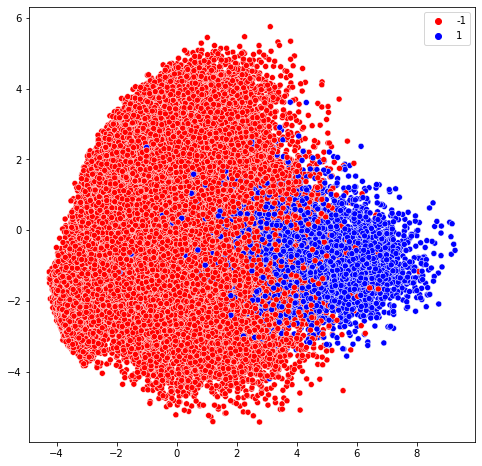

In [7]:
cmap = ListedColormap(['r','b'])

plt.figure(figsize=(8,8))
sns.scatterplot(x = X_train_pca_2d[:,0], y = X_train_pca_2d[:,1], hue=y_train_0, palette=cmap)
plt.show()

### Projection in 3D using PCA

- We use the variables `pipe_pca_3d` and `pipe_clf_pca_3d` for classification.

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


pipe_pca_3d = make_pipeline(
    MinMaxScaler(),
    PCA(n_components=3)
)

X_train_pca_3d = pipe_pca_3d.fit_transform(X_train)

In [9]:
import plotly.express as px
fig = px.scatter_3d(
    x = X_train_pca_3d[:,0],
    y = X_train_pca_3d[:,1],
    z = X_train_pca_3d[:,2],
    color=y_train_0,
    color_discrete_map=cmap,
)
fig.show()

# KNN Classifier

## Algorithm

1. Set $k$ to desired value, i.e. how many neighbours should be allowed to participate in prediction.
2. Calculate the distance between the new example and every example from the data. Thus create a distance vector.
3. Get the indices of nearest $k$ neighbours.
4. Get the labels of the selected $k$ entries.
5. If it is a classfication task, return the majority class by computing the mode of the $k$ labels.

- To understand the working of sklearn built-in functions, we first create a KNN classifier model with $k = 3$ and consider a small no. of samples from the training and testing datasets.
- The `KNeighborClassifier` creates a classifier instance. There are many optional arguments such as `n_neighbors`, `metric`, `weights`, ... that can be set to suitable values while creating an instance.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# creating  a new pipeine for the classifier.
pipe_clf_pca_2d = make_pipeline(
    pipe_pca_2d,
    KNeighborsClassifier(n_neighbors=3)
)

- Let's train the model with just $10$ samples (from each class) from the training set (i.e. we are just putting 10 datapoints in the metric space, not building any parametrized model).
- Then test the model with $10$ datapoints (from each class) from the test set.

In [15]:
X_train_pos = X_train[np.where(y_train_0 == 1)][:10]
X_train_neg = X_train[np.where(y_train_0 == -1)][:10]

In [16]:
X_train_pos_pca_2d = pipe_pca_2d.fit_transform(X_train_pos)
X_train_neg_pca_2d = pipe_pca_2d.fit_transform(X_train_neg)

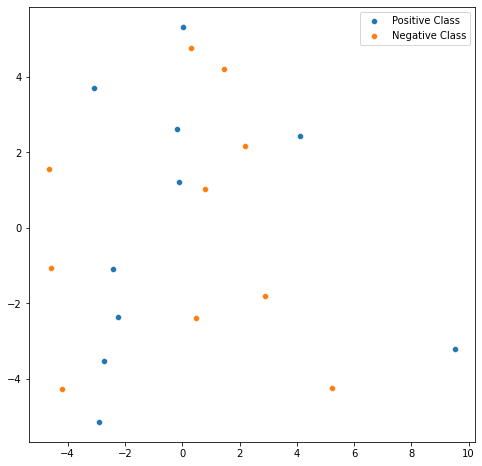

In [20]:
cmap = ListedColormap(['r','b'])

plt.figure(figsize=(8,8))
sns.scatterplot(x = X_train_pos_pca_2d[:,0], y = X_train_pos_pca_2d[:,1])
sns.scatterplot(x = X_train_neg_pca_2d[:,0], y = X_train_neg_pca_2d[:,1])
plt.legend(['Positive Class', 'Negative Class'])
plt.show()

In [ ]:
%%time